# **Assignment 5** #

**Delivery Instructions**:  Similar to previous assignments. See this [**Canvas announcement**](https://njit.instructure.com/courses/11882/discussion_topics/42914) for more details. 



### **Q1. Implement a Union-Find Data Structure**  ###

In lecture 6 we discussed Union-Find Data structures. The lecture was based on these [slides](https://www.cs.princeton.edu/courses/archive/spr09/cos226/lectures/01UnionFind.pdf). The slides contain Java code fo the Union-Find operations. For this assignment you should implement a Python class that implements a Union-Find Data Structure that uses weighting and path compression. Essentially this amounts to translating the code in the slides using the same specifications. Make sure you review the material and understand what the code does, and how it works. 











In [1]:
# your implementation goes here
import unittest

class UnionFind():
    def __init__(self, N):
        self._id = list(range(N))
        self._sz = [1] * N  # size in num of node children

    def find(self, p: int, q: int) -> bool:
        return self.root(p) == self.root(q)

    def root(self, i: int) -> int:
        j = i
        while (j != self._id[j]):
            self._id[j] = self._id[self._id[j]]
            j = self._id[j]
        return j

    def unite(self, p: int, q: int):
        i = self.root(p)
        j = self.root(q)
        if i == j:
            return
        if self._sz[i] < self._sz[j]:
            self._id[i] = j
            self._sz[j] += self._sz[i]
        else:
            self._id[j] = i
            self._sz[i] += self._sz[j]


class basic_tests(unittest.TestCase):
    def test_init(self):
        uf = UnionFind(5)

        self.assertListEqual([0, 1, 2, 3, 4], uf._id)

    def test_find(self):
        uf = UnionFind(10)

        self.assertEqual(uf.find(5, 5), True)
        self.assertEqual(uf.find(5, 4), False)

    def test_unite_1(self):
        iv = [0, 1, 2, 3, 3, 5, 6, 7, 8, 9]
        exp = [0, 1, 2, 3, 3, 5, 6, 7, 8, 3]

        uf = UnionFind(10)
        uf._id = iv

        uf.unite(4, 9)

        self.assertListEqual(uf._id, exp)

    def test_all_1(self):
        uf = UnionFind(10)
        #  use the sample from orig pdf on p33 https://www.cs.princeton.edu/~rs/AlgsDS07/01UnionFind.pdf
        for (p, q) in [(3, 4), (4, 9), (8, 0), (2, 3), (5, 6), (5, 9), (7, 3), (4, 8), (6, 1)]:
            uf.unite(p, q)

        self.assertListEqual(uf._id, [8, 3, 3, 3, 3, 3, 3, 3, 3, 3])

        rv = uf.find(0, 1)
        self.assertTrue(rv)
        self.assertListEqual(uf._id, [3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

#if __name__ == '__main__':
#    unittest.main(verbosity=1)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # unittest.main(verbosity=1)


....
----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


### **Q2. Random Permutation**

Implement a function *randperm* that takes as input a number $n$, and returns a random permutation of the numbers [0...n-1]. This was covered in lecture 7. Your implementation should use $O(1)$ space in addition to the space needed for the output.  (Note: you can use any random number generator functions from Python's *random* module, but you have to give you own implementation for randperm)

In [2]:
# your implementation goes here
import unittest
def randperm(n, seed=42):
    import random
    random.seed(seed)
    rv = list(range(n))

    for i in range(n):
        ind = random.randint(i, n - 1)
        #  swap
        h = rv[i - 1]
        rv[i - 1] = rv[ind]
        rv[ind] = h

    return rv

def randI(n):
    import random
    import math
    return math.floor(n * random.random())

class test_rand_stuff(unittest.TestCase):

    def test_list_diff(self):
        act = randperm(10)
        exp = list(range(10))
        
        self.assertNotEquals(act, exp, 'list is equal')

        #  check if every element in act is in exp
        result = all(elem in act for elem in exp)
        self.assertTrue(result, 'missing elements')

        act.sort()
        self.assertListEqual(act, exp, 'same leng and all elem')


# TODO: move to bottom as this execs all UTs in the notebook
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # unittest.main(verbosity=1)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


### **Q3. Adjacency matrices, powers, numpy** <br>
(this exercise should be useful for your mini-project)

```
![alt text](./assets/network-graph-python-matplotlib.png)
```

![thumb](https://drive.google.com/thumbnail?id=1tIyXRGiQvMv-1EcJxzkQS2MpMNL9hUOA)

Consider the above graph [(also here)](https://drive.google.com/file/d/1tIyXRGiQvMv-1EcJxzkQS2MpMNL9hUOA/view?usp=sharing).

The following exercise should be **repeated twice**.  For the given directed graph and for the same graph where all edges have no directions. 


**(a)** Create a numpy array containing the adjacency matrix $A$ for the graph.

**(b)** A sequence of nodes $v_1,v_2,...,v_k$ is called a walk on graph $G$, if $(v_i,v_{i+1})$ is an edge in $G$. The length of a walk with $k$ vertices is defined to be $k-1$.  In the above graph pick a pair of nodes $(i,j)$, and report all different walks of length 3 from $i$ to $j$. (That is find, all the ways of going from $i$ to $j$ in 3 steps). 

**(c)** Using numpy, calculate $A^3$, the third power of the adjacency matrix. Read the entry $(i,j)$ of this matrix. What do you observe?

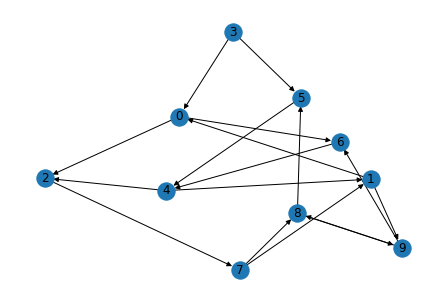

In [3]:
# your code goes here

## just verifying data.

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

E = [[0, 6], [0, 2], [1, 9], [1, 0], [2, 7], [3, 0], [3, 5], [4, 1], [4, 2], [5, 4], [6, 4], [7, 1], [7, 8], [8, 5], [9, 6], [9, 8], [8, 9]]
L = {}

for e in E:
    L[e[0]] = '{}'.format(e[0])

G = nx.DiGraph()
pos = nx.spring_layout(G)
G.add_edges_from(E)
nx.draw(G, with_labels = True)
plt.show()

In [4]:

# part (a)

def make_am(data, directed=False):
    #  get the node list
    nodes = np.unique(data)
    n = len(nodes)
    # create a dict
    node_dict = {n: i for i, n in enumerate(nodes)}

    # inverted to vector
    numdata = np.vectorize(node_dict.get)(data)
    am = np.zeros((n, n),)
    for j, i in numdata:
        am[j, i] = 1
        if not directed:
            am[i, j] = 1

    return am.astype(int)


data = np.array(E)

am_undirected = make_am(data, directed=False)
am_directed = make_am(data, directed=True)

edge_count_undirected = np.sum(am_undirected)
edge_count_directed = np.sum(am_directed)

print('directed adjacency matrix: \n')
print('\tnumber of edges: {} \n'.format(edge_count_directed))
print(am_directed)

print('\nundirected adjacency matrix: \n')
print('\tnumber of edges: {} \n'.format(edge_count_undirected))
print(am_undirected)



directed adjacency matrix: 

	number of edges: 17 

[[0 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0]]

undirected adjacency matrix: 

	number of edges: 32 

[[0 1 1 1 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 1 0 1]
 [1 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [0 1 1 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0 1 0]
 [1 0 0 0 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 1]
 [0 1 0 0 0 0 1 0 1 0]]


In [5]:
#  part (b)



In [6]:
#  part (c)

np.linalg.matrix_power(am_undirected, 3)

array([[ 0, 11,  9,  5,  1,  3,  9,  0,  5,  0],
       [11,  0,  0,  1, 11,  3,  0,  9,  1,  9],
       [ 9,  0,  0,  1,  9,  2,  0,  7,  1,  6],
       [ 5,  1,  1,  0,  3,  4,  1,  3,  0,  3],
       [ 1, 11,  9,  3,  0,  6,  9,  1,  4,  1],
       [ 3,  3,  2,  4,  6,  0,  2,  2,  5,  2],
       [ 9,  0,  0,  1,  9,  2,  0,  6,  1,  7],
       [ 0,  9,  7,  3,  1,  2,  6,  0,  6,  0],
       [ 5,  1,  1,  0,  4,  5,  1,  6,  0,  6],
       [ 0,  9,  6,  3,  1,  2,  7,  0,  6,  0]])

In [7]:
np.linalg.matrix_power(am_directed, 3)

array([[0, 2, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 2, 0, 2, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 3, 0, 2, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0]])

### **Q4. A theoretical question**

Suppose a Python module contains an implementation of a function *maxSpanningTree(G)* that takes as input the adjacency list of graph $G$, with **positive** edge weights, and returns the edges of a maximum weight spanning tree. Further suppose that you can run this function, but you cannot access the code. 

Explain how to use *maxSpanningTree(G)* in order to implement a *minSpanningTree(G)* function. 







your answer goes here. 